<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><span><a href="#TRB" data-toc-modified-id="TRB-4.1">TRB</a></span></li></ul></li><li><span><a href="#TRB" data-toc-modified-id="TRB-5">TRB</a></span><ul class="toc-item"><li><span><a href="#Find-clonally-expanded-cases" data-toc-modified-id="Find-clonally-expanded-cases-5.1">Find clonally expanded cases</a></span><ul class="toc-item"><li><span><a href="#Find-outliers" data-toc-modified-id="Find-outliers-5.1.1">Find outliers</a></span></li></ul></li></ul></li></ul></div>

# Dependencies

In [2]:
options(scipen = 999)

In [3]:
library(ggbeeswarm)
library(Hmisc)
library(reshape2)
library(ggrepel)
library(ggsignif)

Loading required package: ggplot2

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




# Functions

In [4]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")
source("~/OneDrive - UHN/R_src/Heatmap_functions.R")
source("~/OneDrive - UHN/R_src/Oncoprint_functions.R")
source("~/OneDrive - UHN/R_src/diversity_Splot_functions.R")

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.12
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




In [5]:
stat.fx <- function(mydf, group){
    mat_p <- matrix(nrow = 9, 
                    ncol = 1)
    rownames(mat_p) <- c("B.cells", 
                         "Macrophages.M1", "Macrophages.M2",
                         "Neutrophils", "NK.cells", "T.cells.CD4", "T.cells.CD8",
                          "Tregs", "Dendritic.cells")
    colnames(mat_p) <-  "Shanngroup"
    
    for(i in 1:nrow(mat_p)){
        var <- rownames(mat_p)[i]
        wiltest <- tryCatch(wilcox.test(mydf[[var]] ~ mydf[[group]]),            
                            error = function(e) NULL)   
        if(!is.null(wiltest)){
            mat_p[i,1] <- wiltest$p.value 
                            }
                            }
    return(mat_p)
}
                            
padjust.fx <- function(mymat){
    mymat <- as.data.frame(mymat)
    mymat$padj <- p.adjust(mymat[,1], 
                           method = "bonferroni")
    return(mymat[order(mymat$padj),])
    
}                            
   

# Paths

In [6]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [7]:
load(file = file.path(datapath,"TME_clusters/IPD_estimate_metadata_IC.RData"))

In [8]:
load( file = paste0(datapath, "diversity/metadata_IC_TRB.RData"))
load( file = paste0(datapath, "diversity/metadata_IC_TRA.RData"))

In [9]:
metadata_IC$percread <- 8.0947988*exp(metadata_IC$ImmuneScore*0.0006267)

## TRB

In [10]:
pairwise.wilcox.test(log10(metadata_IC_TRB$estimated_Shannon), 
                     metadata_IC_TRB$immune_cluster,
                     p.adjust = "bonferroni")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  log10(metadata_IC_TRB$estimated_Shannon) and metadata_IC_TRB$immune_cluster 

                Pediatric inflamed Myeloid-driven Pediatric cold
Myeloid-driven  0.00023            -              -             
Pediatric cold  0.0000000048       0.00139        -             
Immune excluded 0.00715            1.00000        1.00000       

P value adjustment method: bonferroni 

In [11]:
table(metadata_IC_TRB$immune_cluster)


Pediatric inflamed     Myeloid-driven     Pediatric cold    Immune excluded 
                82                161                 92                 26 

In [12]:
tapply(metadata_IC_TRB$Reads[metadata_IC_TRB$cohort == "NBL"], 
       metadata_IC_TRB$immune_cluster[metadata_IC_TRB$cohort == "NBL"], summary)

$`Pediatric inflamed`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   27.0   141.0   296.0   332.3   487.0   989.0 

$`Myeloid-driven`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.00   77.75  175.00  211.19  297.50  744.00 

$`Pediatric cold`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   32.00   60.00   86.24  115.00  304.00 

$`Immune excluded`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00   10.25   17.00   18.33   21.25   72.00 


In [13]:
tapply(metadata_IC_TRB$TRB, metadata_IC_TRB$immune_cluster, summary)

$`Pediatric inflamed`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   16.25   33.00   91.70   66.00  950.00 

$`Myeloid-driven`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    8.00   14.00   49.32   34.00  518.00 

$`Pediatric cold`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    4.00    7.00   25.92   25.25  287.00 

$`Immune excluded`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    5.50   13.50   13.12   17.00   35.00 


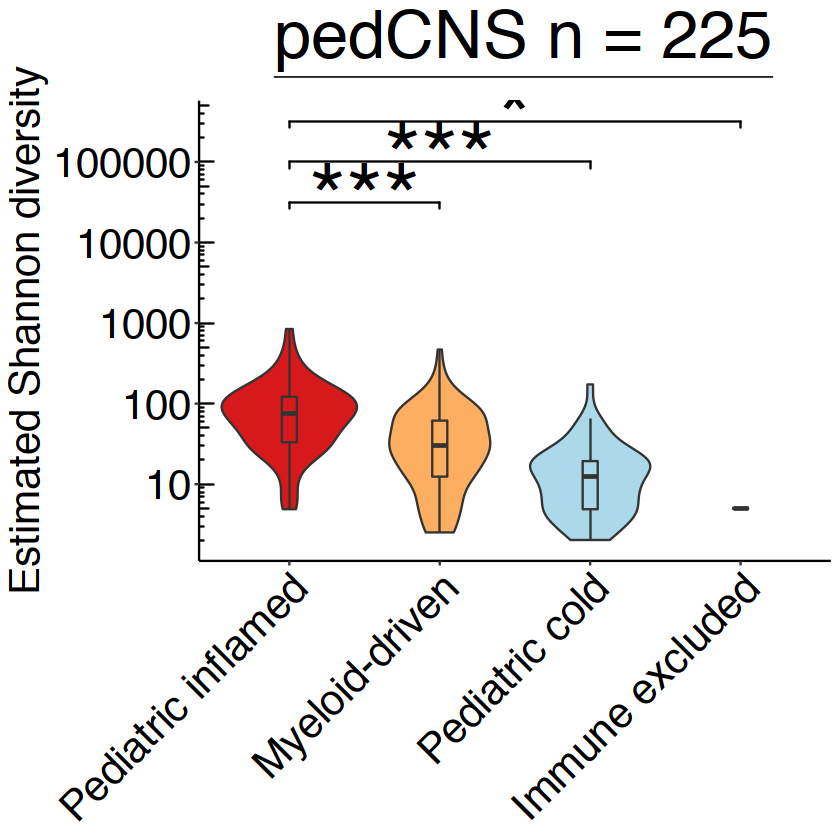

In [14]:
trbplot_cns <- ggplot(data = metadata_IC_TRB[ metadata_IC_TRB$cohort != "NBL",],
                  aes(x = immune_cluster, y = estimated_Shannon, fill = immune_cluster)) + 
geom_violin() + geom_boxplot(width = 0.1, outlier.colour = NA) + myaxis + myplot +
scale_fill_manual(values = cluster_col) + scale_y_continuous(trans = "log10") + annotation_logticks(sides = "l") +
theme(legend.position = "none", axis.title.x = element_blank(),
      plot.title = element_text(hjust = 0.5, size = 40)) + labs(y = "Estimated Shannon diversity") +
geom_signif(comparisons = list(c("Pediatric inflamed", "Myeloid-driven")), y_position = 4.5,
                     map_signif_level=TRUE, textsize = 20, test = "wilcox.test", vjust = 0.5) +
geom_signif(comparisons = list(c("Pediatric inflamed", "Pediatric cold")), y_position = 5,
                     map_signif_level=TRUE, textsize = 20, test = "wilcox.test", vjust = 0.5) +
geom_signif(comparisons = list(c("Pediatric inflamed", "Immune excluded")), y_position = 5.5,
                     map_signif_level=TRUE, textsize = 20, test = "wilcox.test", vjust = 0.5)

trbplot_cns + ggtitle(~underline("pedCNS n = 225"))

Warning message in wilcox.test.default(c(1.24281463978553, 2.01722121453722, 2.42210866529257, :
“cannot compute exact p-value with ties”


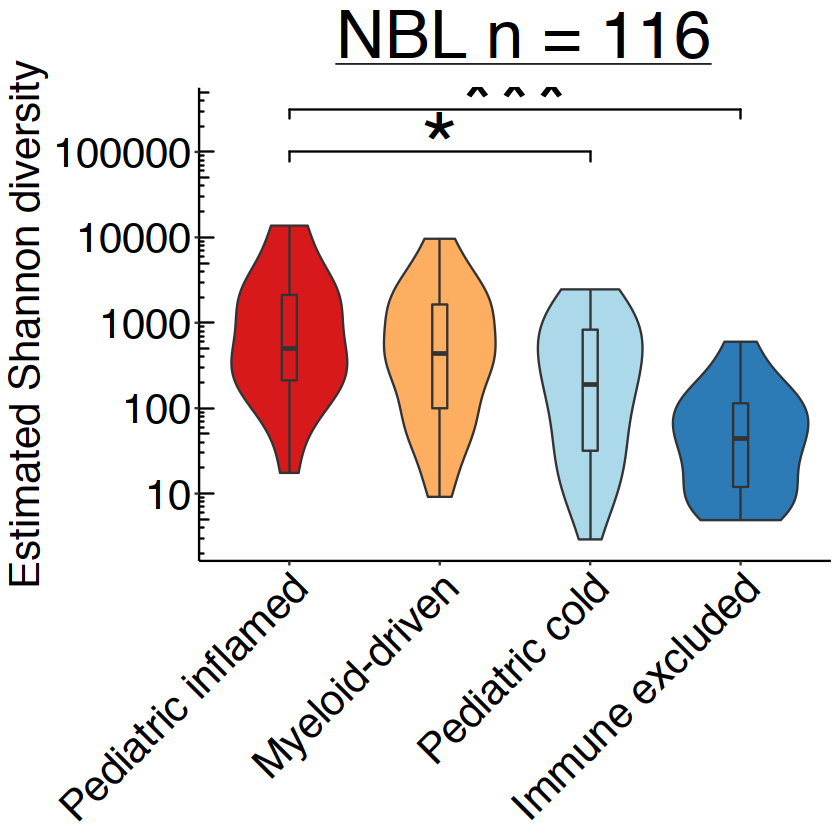

In [15]:
trbplot_nbl <- ggplot(data = metadata_IC_TRB[ metadata_IC_TRB$cohort == "NBL",],
                  aes(x = immune_cluster, y = estimated_Shannon, fill = immune_cluster)) + 
geom_violin() + geom_boxplot(width = 0.1, outlier.colour = NA) + myaxis + myplot +
scale_fill_manual(values = cluster_col) + scale_y_continuous(trans = "log10") + annotation_logticks(sides = "l") +
theme(legend.position = "none", axis.title.x = element_blank(),
      plot.title = element_text(hjust = 0.5, size = 40)) + labs(y = "Estimated Shannon diversity") +
#geom_signif(comparisons = list(c("Pediatric inflamed", "Myeloid-driven")), y_position = 4.5,
#                     map_signif_level=TRUE, textsize = 20, test = "wilcox.test", vjust = 0.5) +
geom_signif(comparisons = list(c("Pediatric inflamed", "Pediatric cold")), y_position = 5,
                     map_signif_level=TRUE, textsize = 20, test = "wilcox.test", vjust = 0.5) +
geom_signif(comparisons = list(c("Pediatric inflamed", "Immune excluded")), y_position = 5.5,
                     map_signif_level=TRUE, textsize = 20, test = "wilcox.test", vjust = 0.5)

trbplot_nbl + ggtitle(~underline("NBL n = 116"))

In [16]:
pdf(file = paste0(plotpath,"Immune_clusters_TRBdiv_CNS.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE)
trbplot_cns + ggtitle(~underline("pedCNS (n = 225)"))
dev.off()

pdf 
  2

In [17]:
pdf(file = paste0(plotpath,"Immune_clusters_TRBdiv_NBL.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE)
trbplot_nbl + ggtitle(~underline("NBL (n = 116)"))
dev.off()

Warning message in wilcox.test.default(c(1.24281463978553, 2.01722121453722, 2.42210866529257, :
“cannot compute exact p-value with ties”


pdf 
  2

# TRB
## Find clonally expanded cases

### Find outliers

cutoff more or less than 2 sd 

In [18]:
metadata_IC_TRB_CNS <- metadata_IC_TRB[ metadata_IC_TRB$cohort != "NBL",]

In [19]:
regression_trb_cns <- lm(log10(estimated_Shannon)~ log10(Reads), data = metadata_IC_TRB_CNS)

summary(regression_trb_cns)

metadata_IC_TRB_CNS$residuals <- residuals(regression_trb_cns)

summary(metadata_IC_TRB_CNS$residuals)

metadata_IC_TRB_CNS$outliergroup <- "none"
metadata_IC_TRB_CNS$outliergroup[ metadata_IC_TRB_CNS$residuals <= -2*sd(metadata_IC_TRB_CNS$residuals)] <- "Outlier_down"
metadata_IC_TRB_CNS$outliergroup[ metadata_IC_TRB_CNS$residuals >= 2*sd(metadata_IC_TRB_CNS$residuals)] <- "Outlier_up"


Call:
lm(formula = log10(estimated_Shannon) ~ log10(Reads), data = metadata_IC_TRB_CNS)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22830 -0.20622  0.01278  0.22947  0.83553 

Coefficients:
             Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   0.07556    0.06156   1.227               0.221    
log10(Reads)  1.16967    0.05124  22.826 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.305 on 243 degrees of freedom
Multiple R-squared:  0.682,	Adjusted R-squared:  0.6806 
F-statistic:   521 on 1 and 243 DF,  p-value: < 0.00000000000000022


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.22830 -0.20622  0.01278  0.00000  0.22947  0.83553 

In [20]:
myp_trb_cns <- ggplot(data = metadata_IC_TRB_CNS, aes(y = estimated_Shannon, x = Reads, label = cohort)) + 
geom_point(aes(color = outliergroup), size = 5) +
scale_color_manual(values = c("Outlier_down" = "#74add1", "Outlier_up" = "#d73027", "none" = "black")) +
geom_smooth(method = "lm", se = FALSE) + 
myplot +
scale_y_continuous(trans = "log10") + scale_x_continuous(trans = "log10") + annotation_logticks(sides = "bl") +
#geom_text_repel(data = subset(metadata_IC_TRB_CNS, outliergroup == "Outlier_down"), segment.size = 0.2,
#               box.padding = 1, direction = "x", hjust = 1,nudge_x  = 1.5, min.segment.length = 0, size = 3) +
#geom_text_repel(data = subset(metadata_IC_TRB_CNS, outliergroup == "Outlier_up"), segment.size = 0.2,
#                box.padding = 0.9,  direction = "x", hjust = 0, nudge_y  = 1, min.segment.length = 0, size = 3) +
theme(legend.position = "none") +
theme(plot.title = element_text(hjust = 0.5, size = 35),
      axis.title = element_text(size = 35),
      axis.line = element_line(color = "black"),
      axis.text.x = element_text(size = 35, color = "black"),
      axis.text.y = element_text(size = 35, color = "black")) +
labs(y = "Estimated Shannon diversity", x = "TCRb reads")

`geom_smooth()` using formula 'y ~ x'



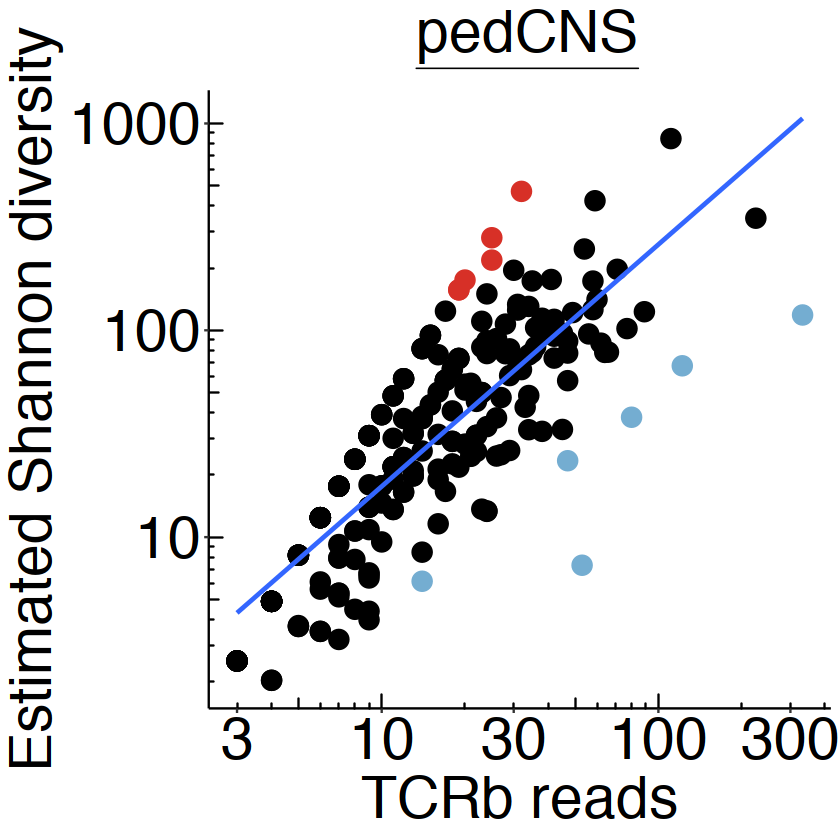

In [21]:
myp_trb_cns + ggtitle(~underline("pedCNS"))

In [22]:
pdf(file = paste0(plotpath,"scatter_Shannon_reads_log_trb_cns.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE)

myp_trb_cns + ggtitle(~underline("pedCNS"))

dev.off()

`geom_smooth()` using formula 'y ~ x'



pdf 
  2

In [23]:
metadata_IC_TRB_NBL <- metadata_IC_TRB[ metadata_IC_TRB$cohort == "NBL",]

In [24]:
regression_trb_nbl <- lm(log10(estimated_Shannon)~ log10(Reads), data = metadata_IC_TRB_NBL)

summary(regression_trb_nbl)

metadata_IC_TRB_NBL$residuals <- residuals(regression_trb_nbl)

summary(metadata_IC_TRB_NBL$residuals)

metadata_IC_TRB_NBL$outliergroup <- "none"
metadata_IC_TRB_NBL$outliergroup[ metadata_IC_TRB_NBL$residuals <= -2*sd(metadata_IC_TRB_NBL$residuals)] <- "Outlier_down"
metadata_IC_TRB_NBL$outliergroup[ metadata_IC_TRB_NBL$residuals >= 2*sd(metadata_IC_TRB_NBL$residuals)] <- "Outlier_up"


Call:
lm(formula = log10(estimated_Shannon) ~ log10(Reads), data = metadata_IC_TRB_NBL)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03656 -0.36038  0.09825  0.41343  1.04361 

Coefficients:
             Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   0.24042    0.18380   1.308               0.193    
log10(Reads)  1.09694    0.09263  11.842 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5731 on 114 degrees of freedom
Multiple R-squared:  0.5516,	Adjusted R-squared:  0.5477 
F-statistic: 140.2 on 1 and 114 DF,  p-value: < 0.00000000000000022


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.03656 -0.36038  0.09825  0.00000  0.41343  1.04361 

In [25]:
table(metadata_IC_TRB_NBL$outliergroup)


        none Outlier_down 
         112            4 

In [26]:
myp_trb_nbl <- ggplot(data = metadata_IC_TRB_NBL, aes(y = estimated_Shannon, x = Reads, label = immune_cluster)) + 
geom_point(aes(color = outliergroup), size = 5) +
scale_color_manual(values = c("Outlier_down" = "#74add1", "Outlier_up" = "#d73027", "none" = "black")) +
geom_smooth(method = "lm", se = FALSE) + 
myplot +
scale_y_continuous(trans = "log10") + scale_x_continuous(trans = "log10") + annotation_logticks(sides = "bl") +
#geom_text_repel(data = subset(metadata_IC_TRB_NBL, outliergroup == "Outlier_down"), segment.size = 0.2,
#               box.padding = 1, direction = "x", hjust = 1,nudge_x  = 1.5, min.segment.length = 0, size = 3) +
#geom_text_repel(data = subset(metadata_IC_TRB_NBL, outliergroup == "Outlier_up"), segment.size = 0.2,
#                box.padding = 0.9,  direction = "x", hjust = 0, nudge_y  = 1, min.segment.length = 0, size = 3) +
theme(legend.position = "none") +
theme(plot.title = element_text(hjust = 0.5, size = 35),
      axis.title = element_text(size = 35),
      axis.line = element_line(color = "black"),
      axis.text.x = element_text(size = 35, color = "black"),
      axis.text.y = element_text(size = 35, color = "black")) +
labs(y = "Estimated Shannon diversity", x = "TCRb reads")

`geom_smooth()` using formula 'y ~ x'



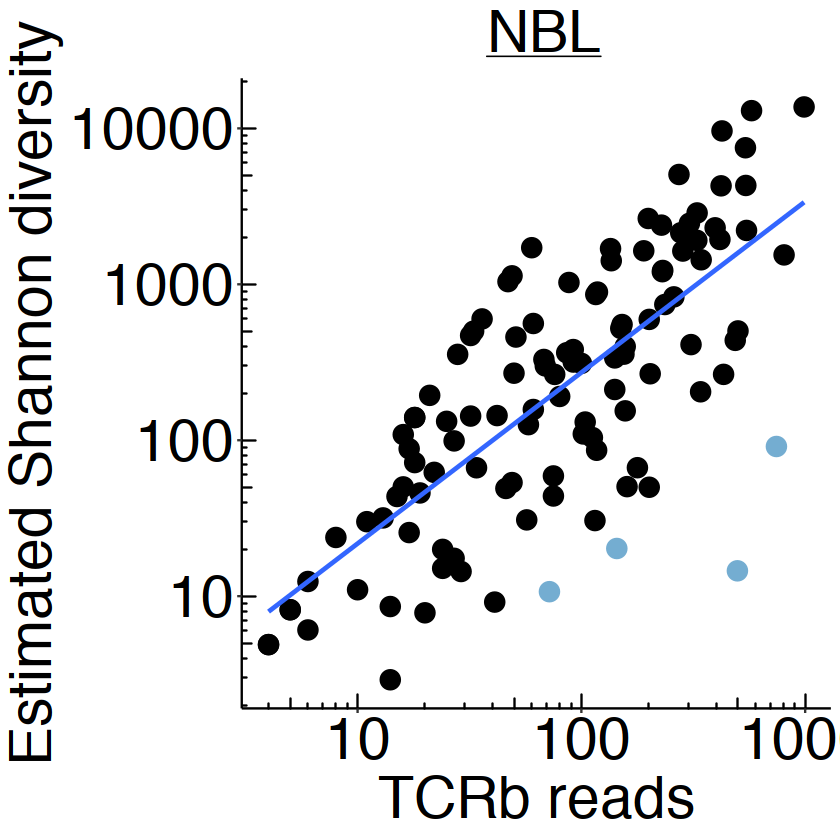

In [27]:
myp_trb_nbl + ggtitle(~underline("NBL"))

In [28]:
pdf(file = paste0(plotpath,"scatter_Shannon_reads_log_trb_nbl.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE)

myp_trb_nbl + ggtitle(~underline("NBL"))

dev.off()

`geom_smooth()` using formula 'y ~ x'



pdf 
  2